Complete the exercises below For **Assignment #6**.

Import the following items,
- `pandas as pd`,
- `LinearRegression` from the [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module,
- `make_column_transformer` from [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose),
- `OneHotEncoder` from [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing),
- `make_pipeline` from the [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) module, and,
- everything from the [plotnine]() package.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from plotnine import *

## Read in our data for this exercise

Use `pd.read_csv` to read in data from the following URL: http://bit.ly/2IgDF0E. Capture the data into a dataframe called `df_voles`.

❗️Hint: just like in `R` we can read data directly from a URL.

In [2]:
import pandas as pd

# URL to the dataset
url = "http://bit.ly/2IgDF0E"

# Read the data into a DataFrame
df_voles = pd.read_csv(url)

Preview the data with the `.head()` method.

The data contains the variables:

- `site` for the id of each random study site (each case or row is a survey/trapping site)
- `voles` for the vole count at each site
- `veg` for the percent cover of vegetation at each site
- `soil` identifying a site as “moist” or “dry”

In [3]:
print(df_voles.head())

   site  voles  veg   soil
0     1     17    4  moist
1     2     30   33  moist
2     3     54   94  moist
3     4     49   64  moist
4     5     34   32  moist


## EDA

Let's make a few figures from `df_voles` using `ggplot` from **Plotnine**.

In the cell below plot the `voles` variable (y-axis) versus the `veg` variable and color points by the `soil` variable.

/tmp/ipykernel_422/3797688267.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


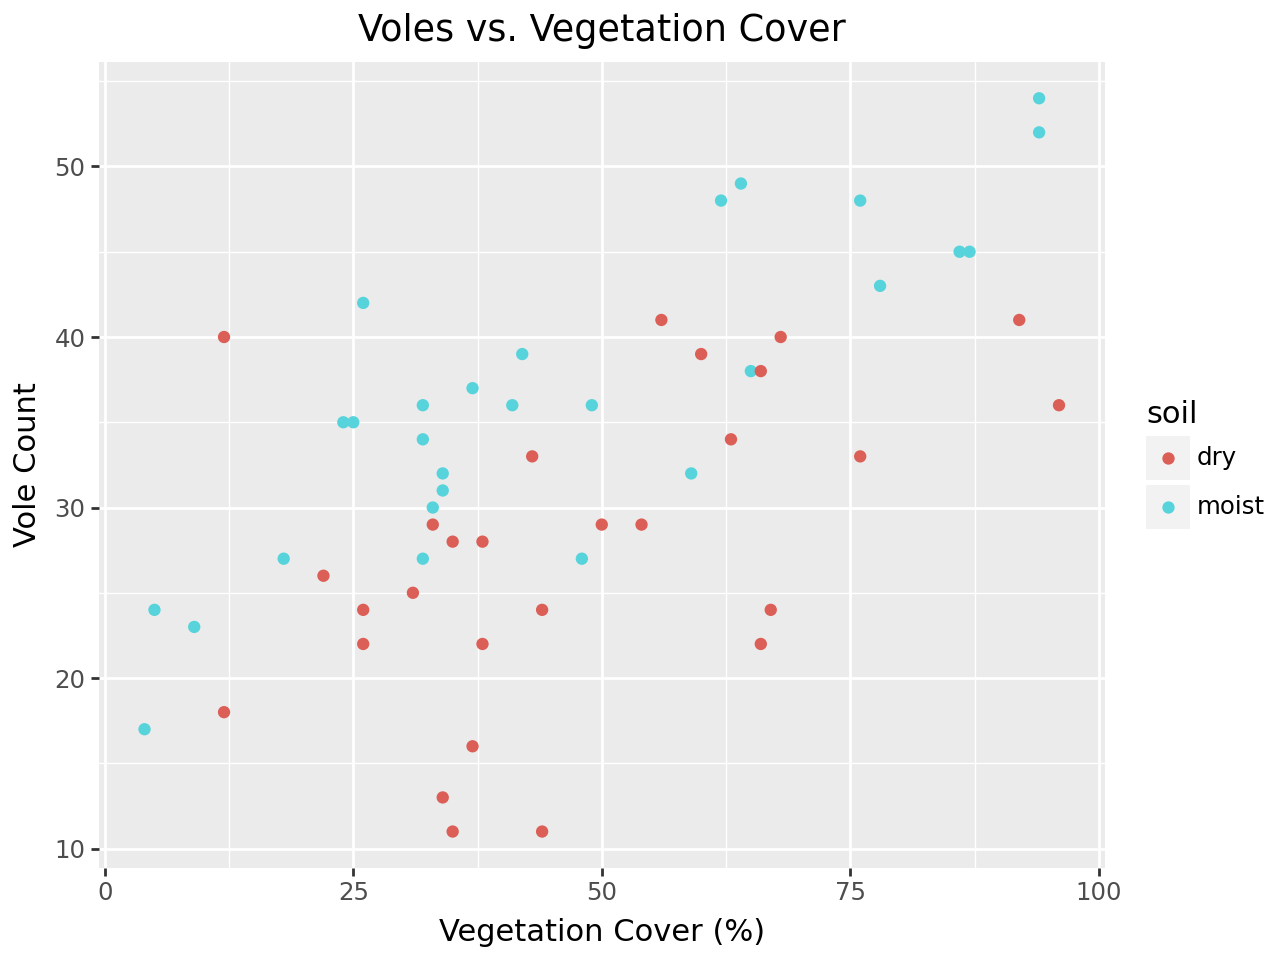

In [4]:
from plotnine import ggplot, aes, geom_point, labs

# Create the plot
plot = (
    ggplot(df_voles, aes(x='veg', y='voles', color='soil')) +
    geom_point() +
    labs(title="Voles vs. Vegetation Cover", x="Vegetation Cover (%)", y="Vole Count")
)

print(plot)

## Modeling

In the cell below, model voles with soil and veg as predictors in a parallel slopes model.

Here are the steps I would take:

Make a column transformer with make_column_transformer that transforms soil with OneHotEncoder(drop="first") and passes 'veg' through untransformed.
Create a pipeline with make_pipeline using the column transformer from above and LinearRegression() as my model.
Get the X (training data) and y predictor from df_voles
Use the .fit() method for the pipeline to train the model with X and y.In the cell below, model `voles` with `soil` and `veg` as predictors in a parallel slopes model. 

Here are the steps I would take:
1. Make a column transformer with `make_column_transformer` that transforms `soil` with `OneHotEncoder(drop="first")` and passes 'veg' through untransformed.
2. Create a pipeline with `make_pipeline` using the column transformer from above and `LinearRegression()` as my model. 
3. Get the `X` (training data) and `y` predictor from `df_voles`
4. Use the `.fit()` method for the pipeline to train the model with `X` and `y`. 

In [5]:
# Step 1: Make a column transformer
column_transformer = make_column_transformer(
    (OneHotEncoder(drop="first"), ['soil']),
    remainder='passthrough'
)

# Step 3=2: Create a pipeline
pipeline = make_pipeline(column_transformer, LinearRegression())

# Step 3: Get the X (training data) and y predictor
X = df_voles[['soil', 'veg']]
y = df_voles['voles']

# Step 4: Fit the model
pipeline.fit(X, y)

# Function to get regression table
def get_regression_table(pipeline):
    terms = list(pipeline.named_steps['columntransformer'].get_feature_names_out()) + ['intercept']
    mod = pipeline.named_steps['linearregression']
    estimates = list(mod.coef_) + [mod.intercept_]
    data = dict(term=terms, estimate=estimates)
    return pd.DataFrame(data)

# Get the regression table
regression_table = get_regression_table(pipeline)



Use the function below to get the parameter values for your model from above.







def get_regression_table(pipeline):
    terms=list(pipeline['columntransformer'].get_feature_names_out()) + ['intercept']
    mod = pipeline['linearregression']
    estimates = list(mod.coef_) + [mod.intercept_]
    data = dict(
        term=terms, 
        estimate=estimates,
    )
    return pd.DataFrame(data)
def get_regression_table(pipeline):
    terms=list(pipeline['columntransformer'].get_feature_names_out()) + ['intercept']
    mod = pipeline['linearregression']
    estimates = list(mod.coef_) + [mod.intercept_]
    data = dict(
        term=terms, 
        estimate=estimates,
    )
    return pd.DataFrame(data)
Use the function below to get the parameter values for your model from above.

In [9]:
def get_regression_table(pipeline):
    terms=list(pipeline['columntransformer'].get_feature_names_out()) + ['intercept']
    mod = pipeline['linearregression']
    estimates = list(mod.coef_) + [mod.intercept_]
    data = dict(
        term=terms, 
        estimate=estimates,
    )
    return pd.DataFrame(data)

# Print the regression table
print(regression_table)

                        term   estimate
0  onehotencoder__soil_moist   9.100298
1             remainder__veg   0.259069
2                  intercept  15.464026


❓Would protecting a site with high vegetation cover be a more effective way to preserve the vole population than a site with low vegetation cover? Why?

(**Hint:** use your chart above to answer. It's also possible to leverage your regression parameters if you chose to model `voles` with a parallel slopes model.)

**Answer:**

In [ ]:
yes, because based on the data populated The coefficient for vegetation cover
is 0.259069 indicating that for each additional percentage point of vegetation cover,
we expect the vole count to increase by approximately 0.259 voles

❓Dry sites typically cost a lot less to purchase and maintain for conservation organizations. Thus, if a conservation organization decides to purchase a few dry sites, roughly what percent cover of vegetation do they need to maintain on these sites (at a minimum) to support a population of about 30 voles at the site?

(**Hint:** In your chart above, draw a line at voles = 30 using `geom_hline` and make a rough estimate for this answer...)

**Answer:**

In [10]:
# Given values
intercept = 15.464026
veg_coefficient = 0.259069
target_voles = 30

# Calculate the required vegetation cover
required_veg = (target_voles - intercept) / veg_coefficient
required_veg


56.1085039120852

In [ ]:
given the data and calculation above: 
To support a population of about 30 voles at a dry site,
the site needs to maintain approximately 56.11% cover of vegetation.

❓The Nature Conservancy is looking at purchasing a site for this species (in the same study area) that has moist soil and 40% vegetation cover. Using the regression equation what would you predict as the possible vole population the site might be able to support?

(**Hint:** Use `.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))` with yout pipeline.)

**Answer:**

In [11]:
# Predict the vole population for a site with moist soil and 40% vegetation cover
prediction = pipeline.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))
prediction[0]

34.92708150903548